1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.

![Ejercicio 1](Ejercicio1.png)


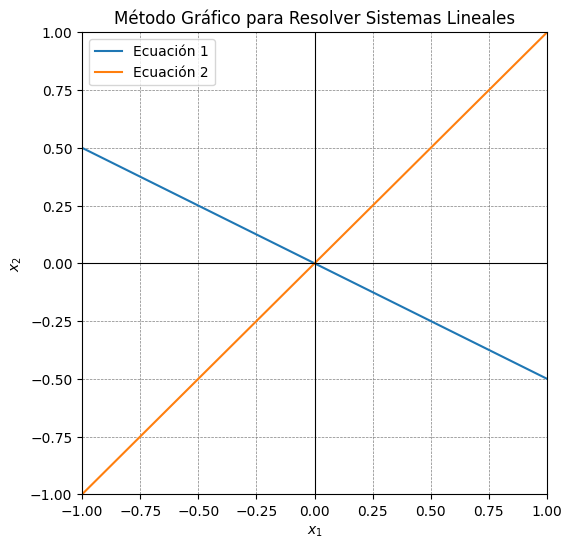

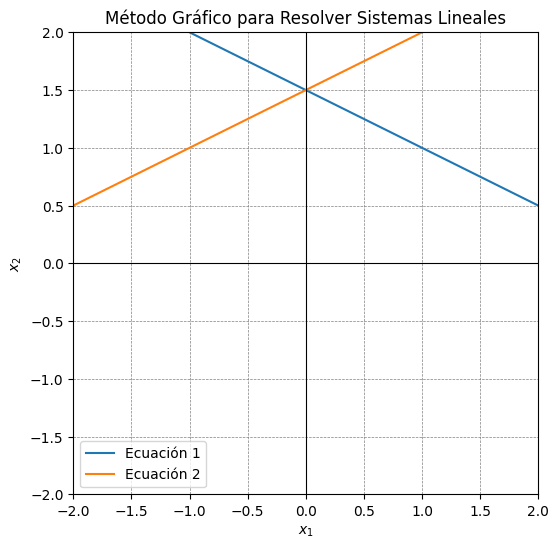

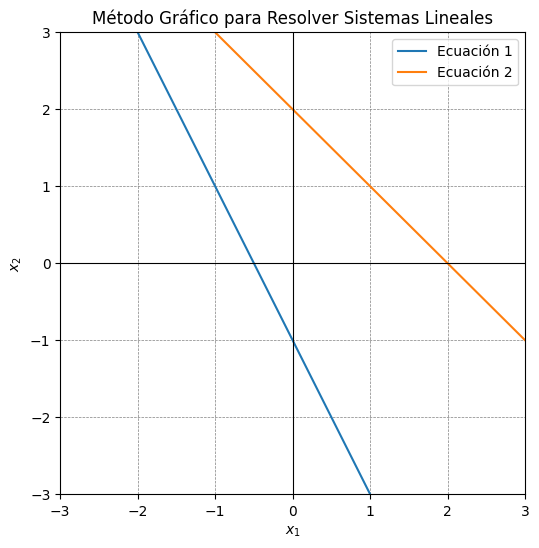

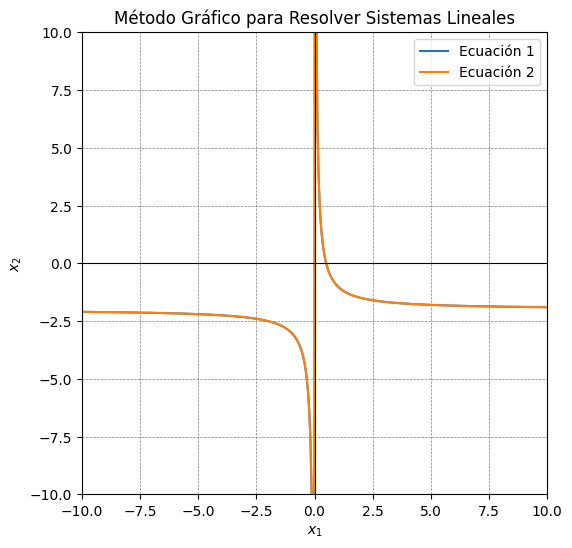

In [35]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

def graficar_sistema(ecuaciones, rango=(-10, 10), puntos=400):
    """
    Función para graficar sistemas de ecuaciones lineales.

    Parámetros:
    - ecuaciones: lista de funciones lambda que representan las ecuaciones despejadas en x2
        y en el ultimo caso en x3.
    - rango: tupla con el rango de valores para x1 (por defecto, (-10, 10)).
    - puntos: número de puntos para graficar (por defecto, 400).
    """
    x1 = np.linspace(rango[0], rango[1], puntos)

    plt.figure(figsize=(6, 6))

    # Graficar cada ecuación
    for i, ecuacion in enumerate(ecuaciones):
        plt.plot(x1, ecuacion(x1), label=f'Ecuación {i + 1}')

    # Configuraciones de la gráfica
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title('Método Gráfico para Resolver Sistemas Lineales')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(rango)
    plt.ylim(rango)

    # Mostrar la gráfica
    plt.show()


# Definición de las ecuaciones

# Ejercicio 1
ejercicioa1 = lambda x1: -x1 / 2
ejercicioa2 = lambda x1: x1

# Ejercicio 2
ejerciciob1 = lambda x1: (3 - x1)/2
ejerciciob2 = lambda x1: (6 + 2*x1)/4

# Ejercicio 3
ejercicioc1 = lambda x1: -1 - 2 * x1
ejercicioc2 = lambda x1:  2 - x1
ejercicioc3 = lambda x1:  (5 + x1)/3

# Ejercicio 4 (Ecuaciones para tres variables)
ejerciciod1 = lambda x1: (1 - 2 * x1) / x1
ejerciciod2 = lambda x1: (1 + 2 * x1 - 4 * x1) / x1

# Resoluciones
graficar_sistema([ejercicioa1, ejercicioa2], rango=(-1, 1))
graficar_sistema([ejerciciob1, ejerciciob2], rango=(-2, 2))
graficar_sistema([ejercicioc1, ejercicioc2], rango=(-3, 3))
graficar_sistema([ejerciciod1, ejerciciod2])


2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver
los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es 𝑥1 = −1,
𝑥2 = 2, 𝑥3 = 3.)

El resultado de este ejercicio segun como se haya planteado la solucion

![Ejercicio 2](Ejercico2.png)


In [36]:
A1 = np.array([[-1.0, 4.0, 1.0],
               [5/3, 3/2, 3/4],
               [2.0, 1.0, 4.0]])
b1 = np.array([8.0, 1.0, 11.0])

A2 = np.array([[4.0, 2.0, -1.0],
               [1/9, 1/9, -1/3],
               [1.0, 4.0, 2.0]])
b2 = np.array([-5.0, -1.0, 9.0])


def gaussian_elimination_with_rounding(A, b):
    n = len(b)
    for k in range(n - 1):
        for i in range(k + 1, n):
            factor = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] = round(A[i][j] - factor * A[k][j], 2)
            b[i] = round(b[i] - factor * b[k], 2)
    return A, b


def back_substitution(A, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0
        for j in range(i + 1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = round((b[i] - sum_ax) / A[i][i], 2)
    return x

# Resolver el primer sistema
A1, b1 = gaussian_elimination_with_rounding(A1, b1)
x1 = back_substitution(A1, b1)

# Resolver el segundo sistema
A2, b2 = gaussian_elimination_with_rounding(A2, b2)
x2 = back_substitution(A2, b2)

print("Solución para el sistema 1: ", x1)
print("Solución para el sistema 2: ", x2)


Solución para el sistema 1:  [-1.59  0.76  3.37]
Solución para el sistema 2:  [-1.01  1.01  2.97]


3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y
determine si se necesitan intercambios de fila:
![Ejercicio3](Ejercicio3.png)

In [43]:
def gaussian_elimination_with_rounding(A, b):
    try:
        n = len(b)
        for k in range(n - 1):
            # Verificar si el pivote es cero
            if A[k][k] == 0:
                # Buscar una fila con un valor no cero en la columna k
                for i in range(k + 1, n):
                    if A[i][k] != 0:
                        # Intercambiar las filas k y i
                        A[k], A[i] = A[i], A[k]
                        b[k], b[i] = b[i], b[k]
                        break
                else:
                    # Si no se encuentra un valor no cero, la matriz es singular
                    raise ValueError(f"La matriz es singular, no se puede resolver el sistema (fila {k} es cero)")
            for i in range(k + 1, n):
                factor = A[i][k] / A[k][k]
                for j in range(k, n):
                    A[i][j] = round(A[i][j] - factor * A[k][j], 2)
                b[i] = round(b[i] - factor * b[k], 2)
        return A, b
    except Exception as e:
        print(f"Error en la eliminación de Gauss: {e}")
        return None, None

# Función para la sustitución hacia atrás
def back_substitution(A, b):
    try:
        n = len(b)
        x = np.zeros(n)
        for i in range(n - 1, -1, -1):
            sum_ax = 0
            for j in range(i + 1, n):
                sum_ax += A[i][j] * x[j]
            if A[i][i] == 0:
                raise ValueError(f"El elemento A[{i}][{i}] es cero. No se puede dividir.")
            x[i] = round((b[i] - sum_ax) / A[i][i], 2)
        return x
    except Exception as e:
        print(f"Error en la sustitución hacia atrás: {e}")
        return None

# Ejercicio a
A_a = np.array([[1.0, -1.0, 3.0],
                [3.0, -3.0, 1.0],
                [1.0, 1.0, 0.0]])
b_a = np.array([2.0, -1.0, 3.0])
A_a, b_a = gaussian_elimination_with_rounding(A_a, b_a)
if A_a is not None and b_a is not None:
    x_a = back_substitution(A_a, b_a)
    if x_a is not None:
        print("Solución para el sistema a:", x_a)

# Ejercicio b
A_b = np.array([[2.0, -1.5, 3.0],
                [-1.0, 0.0, 2.0],
                [4.0, -4.5, 5.0]])
b_b = np.array([1.0, 3.0, 1.0])
A_b, b_b = gaussian_elimination_with_rounding(A_b, b_b)
if A_b is not None and b_b is not None:
    x_b = back_substitution(A_b, b_b)
    if x_b is not None:
        print("Solución para el sistema b:", x_b)

# Ejercicio c
A_c = np.array([[2.0, 0.0, 0.0, 0.0],
                [1.0, 1.5, 0.0, 0.0],
                [0.0, -3.0, 0.5, 0.0],
                [2.0, -2.0, 1.0, 1.0]])
b_c = np.array([3.0, 4.5, -6.6, 0.8])
A_c, b_c = gaussian_elimination_with_rounding(A_c, b_c)
if A_c is not None and b_c is not None:
    x_c = back_substitution(A_c, b_c)
    if x_c is not None:
        print("Solución para el sistema c:", x_c)

# Ejercicio d
A_d = np.array([[1.0, 1.0, 0.0, 1.0],
                [2.0, 1.0, -1.0, 1.0],
                [4.0, 0.0, -2.0, 2.0],
                [3.0, -1.0, -1.0, 2.0]])
b_d = np.array([2.0, 1.0, 0.0, -3.0])
A_d, b_d = gaussian_elimination_with_rounding(A_d, b_d)
if A_d is not None and b_d is not None:
    x_d = back_substitution(A_d, b_d)
    if x_d is not None:
        print("Solución para el sistema d:", x_d)


Error en la sustitución hacia atrás: El elemento A[2][2] es cero. No se puede dividir.
Solución para el sistema b: [-1. -0.  1.]
Solución para el sistema c: [ 1.5  2.  -1.2  3. ]
Error en la sustitución hacia atrás: El elemento A[3][3] es cero. No se puede dividir.


4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los
siguientes sistemas lineales.

![Ejercicio 4](Ejercicio4.png)

In [42]:
def gaussian_elimination_with_rounding(A, b):
    n = len(b)
    for k in range(n - 1):
        try:
            # Verificar si el pivote es cero
            if A[k][k] == 0:
                raise ValueError(f"El pivote A[{k}][{k}] es cero. No se puede continuar con la eliminación de Gauss.")

            for i in range(k + 1, n):
                factor = A[i][k] / A[k][k]
                for j in range(k, n):
                    A[i][j] = round(A[i][j] - factor * A[k][j], 6)
                b[i] = round(b[i] - factor * b[k], 6)
        except ValueError as e:
            print(e)
            return A, b
    return A, b

# Función para la sustitución hacia atrás con redondeo
def back_substitution(A, b):
    n = len(b)
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0
        for j in range(i + 1, n):
            sum_ax += A[i][j] * x[j]

        try:
            # Verificar si el elemento diagonal es cero antes de dividir
            if A[i][i] == 0:
                raise ZeroDivisionError(f"El elemento A[{i}][{i}] es cero. Esto puede resultar en una solución indefinida o no única.")
            x[i] = round((b[i] - sum_ax) / A[i][i], 6)
        except ZeroDivisionError as e:
            print(e)
            x[i] = np.nan  # Asignar NaN si se detecta una división por cero
    return x

# Ejercicio a
A_a = np.array([[1/4, 1/5, 1/3],
                [1/3, 1/4, 1/5],
                [1/2, 1, 2/3]])
b_a = np.array([9, 8, 8])
A_a, b_a = gaussian_elimination_with_rounding(A_a, b_a)
x_a = back_substitution(A_a, b_a)
print("Solución para el sistema a:", x_a)

# Ejercicio b
A_b = np.array([[3.333, 15920, -10.333],
                [2.222, 16.71, 9.612],
                [1.5611, 5.1791, 1.6852]])
b_b = np.array([15913, 28.544, 8.4254])
A_b, b_b = gaussian_elimination_with_rounding(A_b, b_b)
x_b = back_substitution(A_b, b_b)
print("Solución para el sistema b:", x_b)

# Ejercicio c
A_c = np.array([[1, 1/2, 1/3, 1/4],
                [1/2, 1/3, 1/4, 1/5],
                [1/3, 1/4, 1/5, 1/6],
                [1/4, 1/5, 1/6, 1/7]])
b_c = np.array([1, 1/6, 1/7, 1/8])
A_c, b_c = gaussian_elimination_with_rounding(A_c, b_c)
x_c = back_substitution(A_c, b_c)
print("Solución para el sistema c:", x_c)

# Ejercicio d
A_d = np.array([[2, 1, -1, 1, -3],
                [1, 0, 2, -1, 1],
                [0, -2, -1, -1, -1],
                [3, 2, -4, 0, 5],
                [1, -1, -1, -1, 1]])
b_d = np.array([7, 2, -5, 6, -3])
A_d, b_d = gaussian_elimination_with_rounding(A_d, b_d)
x_d = back_substitution(A_d, b_d)
print("Solución para el sistema d:", x_d)

Solución para el sistema a: [ 24.821516 -15.0048    17.386743]
Solución para el sistema b: [1. 1. 1.]
Solución para el sistema c: [  12.749723  -95.306066  189.727339 -109.356546]
El pivote A[1][1] es cero. No se puede continuar con la eliminación de Gauss.
El elemento A[1][1] es cero. Esto puede resultar en una solución indefinida o no única.
Solución para el sistema d: [ nan  nan  31. -23.  -3.]


5. Dado el sistema lineal:

![Ejercicio 5](Ejercicio5.png)

In [47]:
def analyze_system(alpha):
    matrix = [
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ]
    vector = [-2, 3, 2]

    try:
        # Convertir a matrices numpy
        matrix = np.array(matrix, dtype=float)
        vector = np.array(vector, dtype=float)

        # Intentar resolver el sistema
        solution = np.linalg.solve(matrix, vector)
        return solution
    except np.linalg.LinAlgError:
        return "No tiene solución o tiene infinitas soluciones"

alphas = [-1, 0, 1]
for alpha in alphas:
    result = analyze_system(alpha)
    print(f"Para α = {alpha}, la solución es: {result}")

Para α = -1, la solución es: No tiene solución o tiene infinitas soluciones
Para α = 0, la solución es: [-1.  1.  1.]
Para α = 1, la solución es: No tiene solución o tiene infinitas soluciones


6. Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si 𝑥𝑗 representa la
población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; 𝑏𝑖; representa el suministro diario disponible del i-ésimo
alimento y 𝑎𝑖𝑗 representa la cantidad del i-ésimo alimento.
![Ejercicio 6](Ejercicio6.png)

In [46]:
A = np.array([[1, 2, 0, 3],
              [1, 0, 2, 2],
              [0, 0, 1, 1]], dtype=float)
x = np.array([1000, 500, 350, 400], dtype=float)
b = np.array([3500, 2700, 900], dtype=float)

# a. Verificar si hay suficiente alimento para satisfacer el consumo promedio diario
consumo_diario = np.dot(A, x)
suficiente_alimento = np.allclose(consumo_diario, b)
print(f"¿Hay suficiente alimento para satisfacer el consumo promedio diario? {suficiente_alimento}")

# b. Número máximo de animales de cada especie que se podrían agregar individualmente
max_animales = b // consumo_diario
print("Número máximo de animales que se podrían agregar individualmente:", max_animales)

# c. Cantidad de incremento individual de las especies restantes si la especie 1 se extingue
x_extinct_species1 = x.copy()
x_extinct_species1[0] = 0
consumo_diario_extinct_species1 = np.dot(A, x_extinct_species1)
incremento_especies_restantes1 = (b - consumo_diario_extinct_species1) // x[1:]
print("Incremento de especies restantes si la especie 1 se extingue:", incremento_especies_restantes1)

# d. Cantidad de incremento individual de las especies restantes si la especie 2 se extingue
x_extinct_species2 = x.copy()
x_extinct_species2[1] = 0
consumo_diario_extinct_species2 = np.dot(A, x_extinct_species2)
incremento_especies_restantes2 = (b - consumo_diario_extinct_species2) // x[[0, 2, 3]]
print("Incremento de especies restantes si la especie 2 se extingue:", incremento_especies_restantes2)


¿Hay suficiente alimento para satisfacer el consumo promedio diario? False
Número máximo de animales que se podrían agregar individualmente: [1. 1. 1.]
Incremento de especies restantes si la especie 1 se extingue: [2. 3. 0.]
Incremento de especies restantes si la especie 2 se extingue: [1. 0. 0.]
